In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

Text(0.5, 1.0, 'Scan')

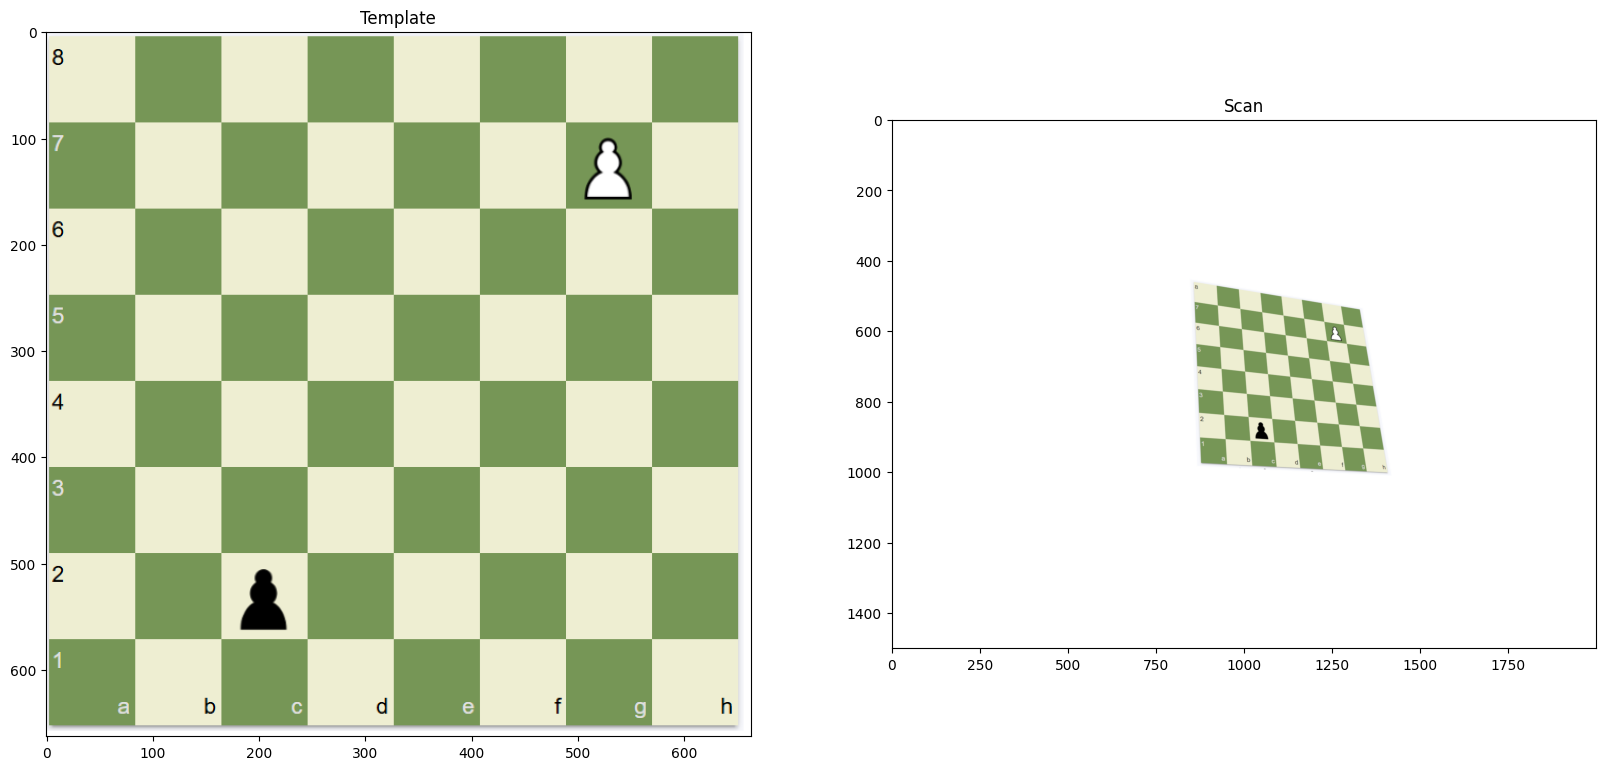

In [133]:
templateImg = cv2.imread("Chess_desk_template.png", 1)[:,:,::-1]
scanImg = cv2.imread("Chess_desk.png", 1)[:,:,::-1]

plt.figure(figsize=[20, 10])
plt.subplot(121); plt.imshow(templateImg); plt.title("Template")
plt.subplot(122); plt.imshow(scanImg); plt.title("Scan")

Text(0.5, 1.0, 'Scan')

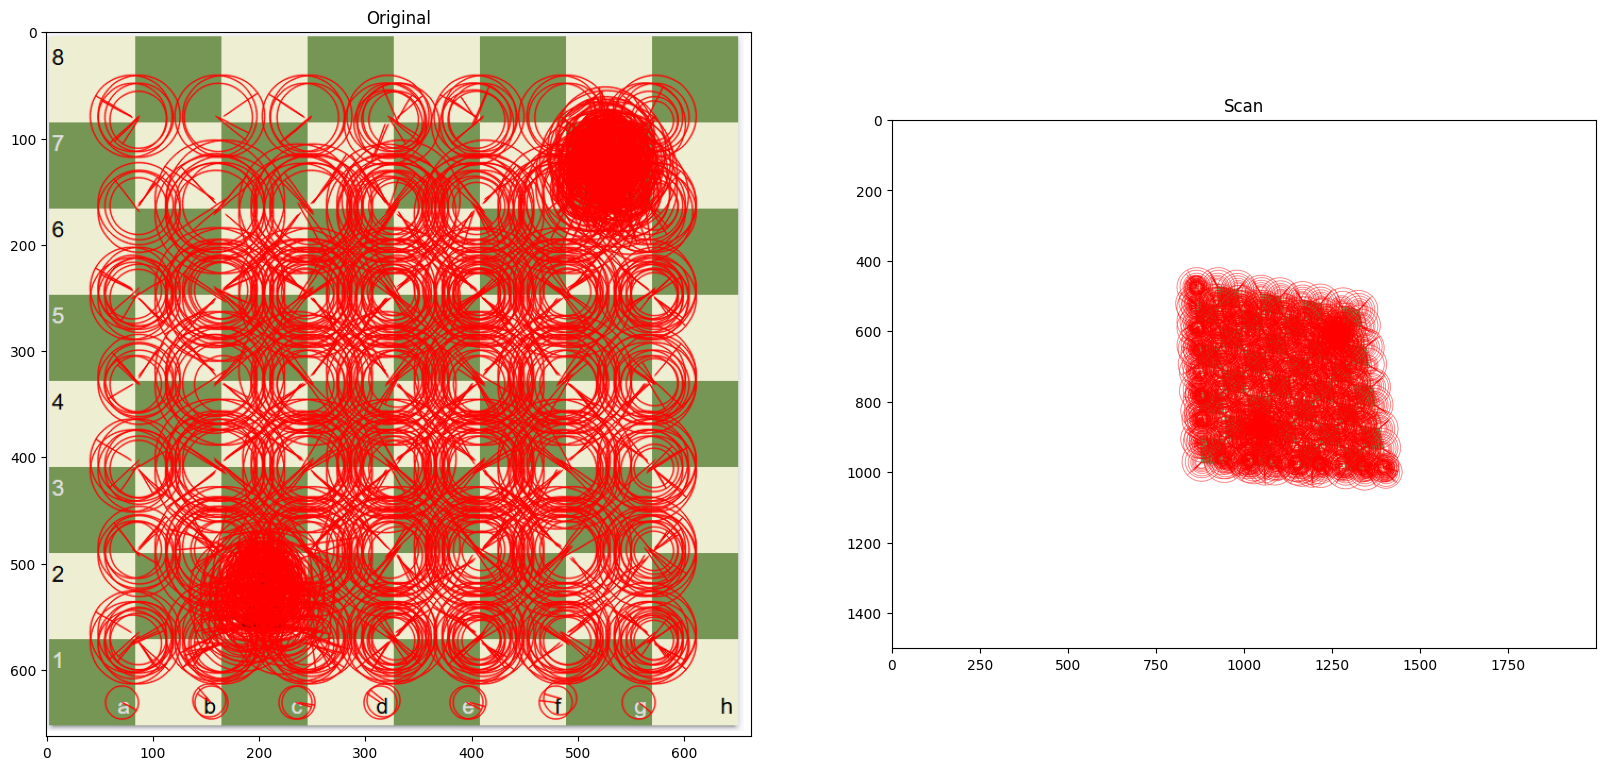

In [134]:
img1Gray = cv2.cvtColor(templateImg, cv2.COLOR_RGB2GRAY)
img2Gray = cv2.cvtColor(scanImg, cv2.COLOR_RGB2GRAY)

maxNFeatures = 4000
orb = cv2.ORB_create(maxNFeatures)
keypoints1, desc1 = orb.detectAndCompute(img1Gray, None)
keypoints2, desc2 = orb.detectAndCompute(img2Gray, None)

img1ToShow = cv2.drawKeypoints(templateImg, keypoints1, color=(255, 0, 0), outImage = np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2ToShow = cv2.drawKeypoints(scanImg, keypoints2, color=(255, 0, 0), outImage = np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[20, 10])
plt.subplot(121); plt.imshow(img1ToShow); plt.title("Original")
plt.subplot(122); plt.imshow(img2ToShow); plt.title("Scan")

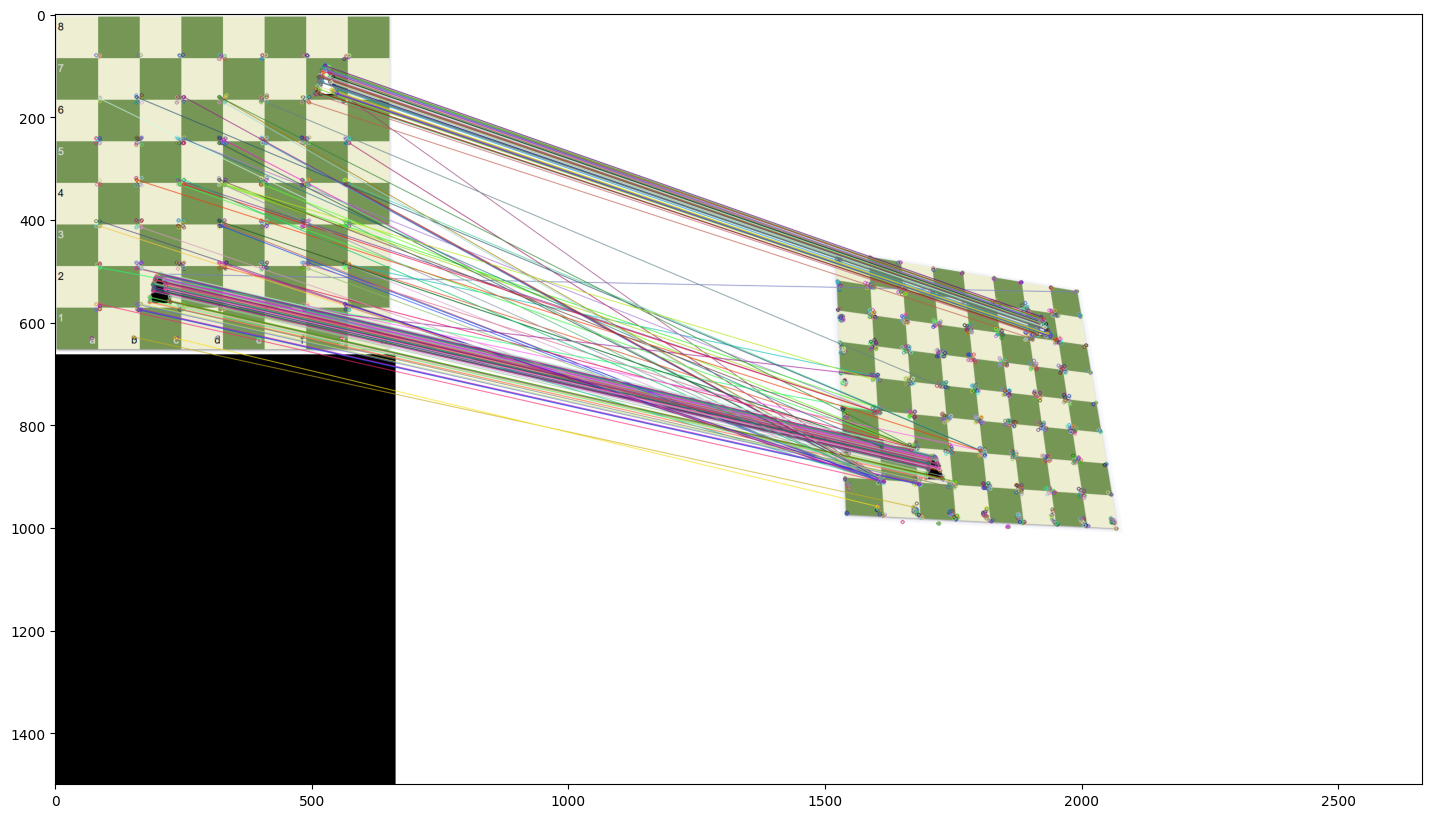

In [135]:
# matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
# matches = matcher.match(desc1, desc2, None)

# matches = list(matches)
# matches.sort(key = lambda x : x.distance, reverse = False)
# nGoodMatches = int(len(matches) * 0.1)
# matches = matches[:nGoodMatches]
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(desc1, desc2, k=2)
# matches = sorted(matches, key=lambda x: x.distance)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

imMatches = cv2.drawMatches(templateImg, keypoints1, scanImg, keypoints2, good, None)
plt.figure(figsize=[40,10])
plt.imshow(imMatches);

In [136]:
points1 = np.zeros((len(matches), 2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

for i, match in enumerate(matches):
    points1[i,:] = keypoints1[match[0].queryIdx].pt
    points2[i,:] = keypoints2[match[0].trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

print(h)

[[ 1.24795047e+00 -2.69762459e-02 -1.06536014e+03]
 [-2.14293904e-01  1.47897511e+00 -5.11370809e+02]
 [-2.30909747e-04  3.50621417e-04  1.00000000e+00]]


Text(0.5, 1.0, 'Scan updated')

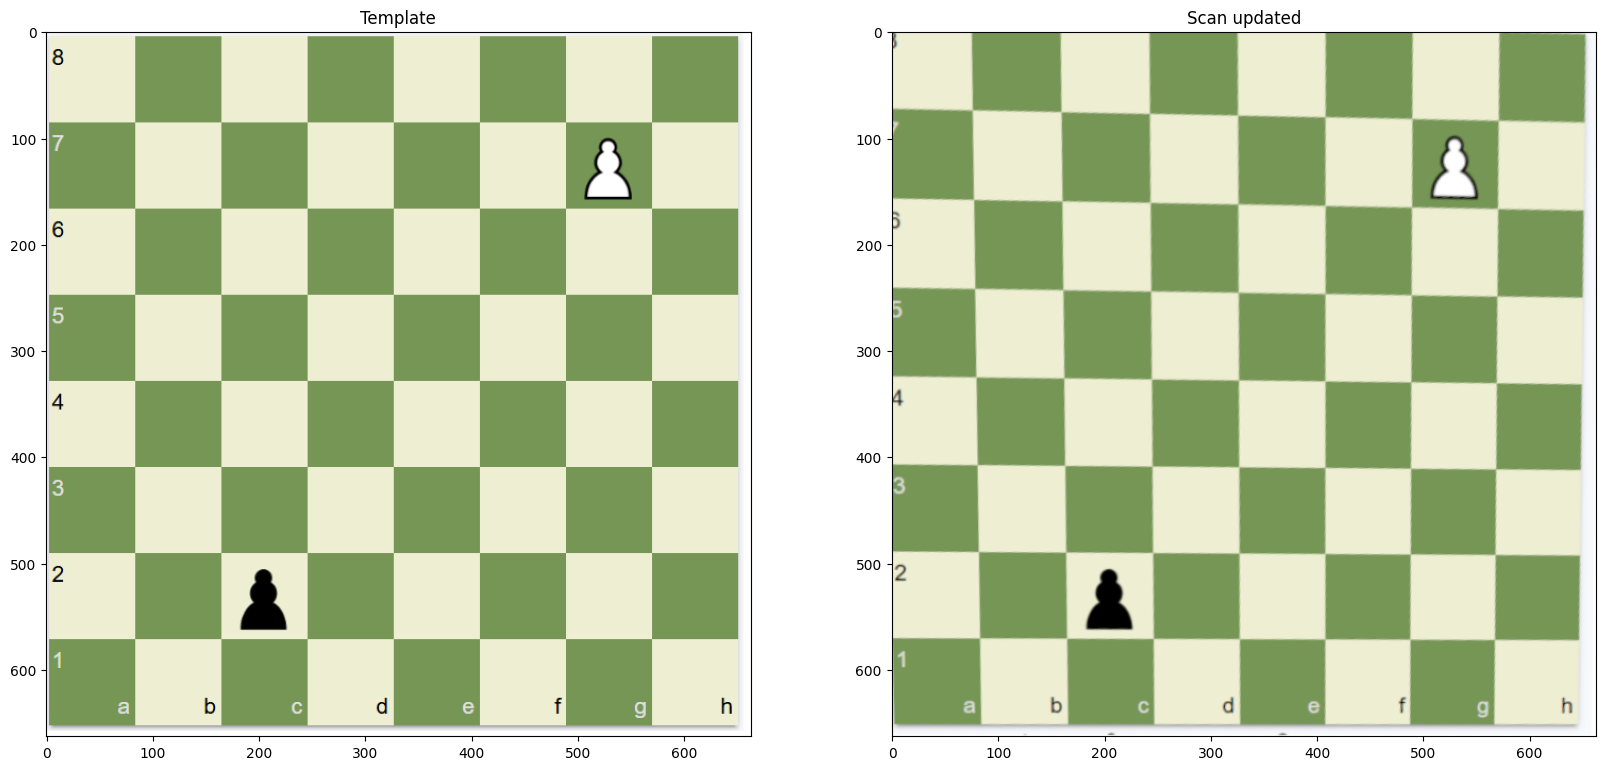

: 

In [ ]:
height, width, _ = templateImg.shape
scanImgUpdated = cv2.warpPerspective(scanImg, h, (width, height))

plt.figure(figsize = [20, 10])
plt.subplot(121); plt.imshow(templateImg); plt.title("Template")
plt.subplot(122); plt.imshow(scanImgUpdated); plt.title("Scan updated")